# systematics
extract the CC1p0π cross-sections from the overlay based on truth information

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [13]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/'

In [3]:
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_on_beam.csv and found the file...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_genie_CC1p.csv and found the file...
9538 selected CC1p events overlay


# apply the efficiency weights - if they were not computed yet

In [6]:
if (("Pmu weight" not in selected_beam_on.columns) 
    or ("Pmu weight" not in selected_beam_off.columns)    
    or ("Pmu weight" not in selected_CC1p.columns)
    or ("Pmu weight" not in selected_overlay_concat.columns)):
    
    print 'no Pmu weights, computing them'
    compute_eff_weights(   beam_on=selected_beam_on,
                           beam_off=selected_beam_off,                       
                           generated_CC1p=genie_CC1p,                       
                           selected_CC1p=selected_CC1p ,                       
                           overlay=selected_overlay_concat) 
    
    overlay_prefix = Paths['selected events'] + versions['Overlay'] + '_' + versions['overlay date'] + '_'
    data_prefix = Paths['selected events'] + versions['beam on'] + '_' + versions['data date'] + '_'
    for sam,name,prefix in zip([selected_overlay_concat,selected_CC1p,selected_beam_on,selected_beam_off]                       
                               ,['overlay','CC1p','beam_on','beam_off']
                               ,[overlay_prefix,overlay_prefix,data_prefix,data_prefix]):
        outcsvname = prefix+'selected_'+name+'.csv'
        sam.to_csv(outcsvname)
        print 'saved ',len(sam),'selected '+name+' events to',outcsvname    
    print 'done assiging Pmu weights and saving the files.'
else:
     print 'Pmu weights already exist'

Pmu weights already exist


In [22]:
if (("Pmu weight truth" not in selected_CC1p.columns)
    or ("Pmu weight truth" not in selected_overlay_concat.columns)):
    
    print 'no Pmu weights truth, computing them'
    compute_eff_weights(   option="CC1p truth",
                           beam_on=selected_beam_on,
                           beam_off=selected_beam_off,                       
                           generated_CC1p=genie_CC1p,                       
                           selected_CC1p=selected_CC1p ,                       
                           overlay=selected_overlay_concat) 
    
    overlay_prefix = Paths['selected events'] + versions['Overlay'] + '_' + versions['overlay date'] + '_'
    data_prefix = Paths['selected events'] + versions['beam on'] + '_' + versions['data date'] + '_'
    for sam,name,prefix in zip([selected_overlay_concat,selected_CC1p,selected_beam_on,selected_beam_off]                       
                               ,['overlay','CC1p','beam_on','beam_off']
                               ,[overlay_prefix,overlay_prefix,data_prefix,data_prefix]):
        outcsvname = prefix+'selected_'+name+'.csv'
        sam.to_csv(outcsvname)
        print 'saved ',len(sam),'selected '+name+' events to',outcsvname    
    print 'done assiging Pmu weights truth and saving the files.'
else:
     print 'Pmu weights truth already exist'

Pmu weights truth already exist


In [10]:
if (("Pp weight" not in selected_beam_on.columns) 
    or ("Pp weight" not in selected_beam_off.columns)    
    or ("Pp weight" not in selected_CC1p.columns)
    or ("Pp weight" not in selected_overlay_concat.columns)):
    
    print 'no Pp weights, computing them'
    compute_eff_weights(   beam_on=selected_beam_on,
                           beam_off=selected_beam_off,                       
                           generated_CC1p=genie_CC1p,                       
                           selected_CC1p=selected_CC1p ,                       
                           overlay=selected_overlay_concat
                        ,ob_1='Pp',ob_2='cos(theta(p))',ob_3='phi(p)'                       
                        ,reco_1='reco_Pp',reco_2='reco_Pp_cos_theta',reco_3='reco_Pp_phi'                       
                        ,true_1='truth_Pp',true_2='truth_Pp_cos_theta',true_3='truth_Pp_phi') 
    
    overlay_prefix = Paths['selected events'] + versions['Overlay'] + '_' + versions['overlay date'] + '_'
    data_prefix = Paths['selected events'] + versions['beam on'] + '_' + versions['data date'] + '_'
    for sam,name,prefix in zip([selected_overlay_concat,selected_CC1p,selected_beam_on,selected_beam_off]                       
                               ,['overlay','CC1p','beam_on','beam_off']
                               ,[overlay_prefix,overlay_prefix,data_prefix,data_prefix]):
        outcsvname = prefix+'selected_'+name+'.csv'
        sam.to_csv(outcsvname)
        print 'saved ',len(sam),'selected '+name+' events to',outcsvname    
    print 'done assiging Pp weights and saving the files.'
else:
     print 'Pp weights already exist'

Pp weights already exist


In [23]:
if (("Pp weight truth" not in selected_CC1p.columns)
    or ("Pp weight truth" not in selected_overlay_concat.columns)):
    
    print 'no Pp weights truth, computing them'
    compute_eff_weights(   option="CC1p truth",
                           beam_on=selected_beam_on,
                           beam_off=selected_beam_off,                       
                           generated_CC1p=genie_CC1p,                       
                           selected_CC1p=selected_CC1p ,                       
                           overlay=selected_overlay_concat
                          ,ob_1='Pp',ob_2='cos(theta(p))',ob_3='phi(p)'                       
                          ,reco_1='reco_Pp',reco_2='reco_Pp_cos_theta',reco_3='reco_Pp_phi'                       
                          ,true_1='truth_Pp',true_2='truth_Pp_cos_theta',true_3='truth_Pp_phi') 
    
    overlay_prefix = Paths['selected events'] + versions['Overlay'] + '_' + versions['overlay date'] + '_'
    data_prefix = Paths['selected events'] + versions['beam on'] + '_' + versions['data date'] + '_'
    for sam,name,prefix in zip([selected_overlay_concat,selected_CC1p,selected_beam_on,selected_beam_off]                       
                               ,['overlay','CC1p','beam_on','beam_off']
                               ,[overlay_prefix,overlay_prefix,data_prefix,data_prefix]):
        outcsvname = prefix+'selected_'+name+'.csv'
        sam.to_csv(outcsvname)
        print 'saved ',len(sam),'selected '+name+' events to',outcsvname    
    print 'done assiging Pp weights truth and saving the files.'
else:
     print 'Pp weights truth already exist'

no Pp weights truth, computing them
done.
saved  12127 selected overlay events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_overlay.csv
saved  9538 selected CC1p events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_22_selected_CC1p.csv
saved  462 selected beam_on events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_on.csv
saved  15 selected beam_off events to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_beam_off.csv
done assiging Pp weights truth and saving the files.


## Draw the cross-sections

In [43]:
def draw_Xsecs(do_add_afro_genie = True, do_corr_phi_0=False, debug=0, particle='mu', 
               do_P=True, do_cos_theta=True, do_phi=True,
               do_add_beam_on=False):

    with_ctmu_bin_reco = get_Xsecs(do_corr_phi_0=do_corr_phi_0, debug=debug, particle=particle,                                               
                                                do_P=do_P, do_cos_theta=do_cos_theta, do_phi=do_phi,                                                                      
                                                selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                                                
                                                selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,
                                                extra_wname="")
    with_ctmu_bin_truth = get_Xsecs(do_corr_phi_0=do_corr_phi_0, debug=debug,particle=particle, 
                                                do_P=do_P, do_cos_theta=do_cos_theta, do_phi=do_phi,                                                                      
                                                selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                                                
                                                selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,
                                                extra_wname=" truth")

    no_ctmu_bin_reco = get_Xsecs(do_corr_phi_0=do_corr_phi_0, debug=debug,particle=particle,                                           
                                           do_P=do_P, do_cos_theta=do_cos_theta, do_phi=do_phi,                                           
                                           remove_last_cos_theta_mu_bin=True,                                                                                            
                                           selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                                           
                                           selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,                                           
                                           extra_wname="")
    no_ctmu_bin_truth = get_Xsecs(do_corr_phi_0=do_corr_phi_0, debug=debug, particle=particle,                                           
                                           do_P=do_P, do_cos_theta=do_cos_theta, do_phi=do_phi,                                           
                                           remove_last_cos_theta_mu_bin=True,                                                                                            
                                           selected_beam_on=selected_beam_on,selected_beam_off=selected_beam_off,                                           
                                           selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p,                                           
                                           extra_wname=" truth")

    Sigmas_Summary = dict()
    figurename = 'Xsec_1D_P'+particle 
    for iXsec,(Xsec_pair,do_cos_theta,Xsec_name) in enumerate(zip([[with_ctmu_bin_reco,with_ctmu_bin_truth],[no_ctmu_bin_reco,no_ctmu_bin_truth]]
                                                                  ,[True,False]
                                                                    ,['with_last_Pmu_cos_theta_bin','without_last_Pmu_cos_theta_bin'])):
        Xsec_reco = Xsec_pair[0]
        Xsec_truth = Xsec_pair[1]

        fig=plt.figure(figsize=(24,8))
        for i,(observable,true,ivar,do_var) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']                                                        
                                                                 ,['truth_P'+particle,'truth_P'+particle+'_cos_theta','truth_P'+particle+'_phi']
                                                                 ,[(1,4),(2,5),(3,6)]
                                                                 ,[do_P,do_cos_theta,do_phi])):
            if do_var==False: continue
            if debug: print observable
            var,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            mul = 180./np.pi if 'phi' in observable else 1
            h = dict()
            h['Xsec'],h['Xsec err'] = Xsec_reco[observable],Xsec_reco[observable+' err']
            h['mc Xsec reco'],h['mc Xsec reco err'] = Xsec_reco['mc '+observable], Xsec_reco['mc '+observable+' err']
            h['mc Xsec truth'],h['mc Xsec truth err'] = Xsec_truth['mc '+observable], Xsec_truth['mc '+observable+' err']


            ax = fig.add_subplot(3,3,ivar)
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o',label='data')
            ax.bar( x=mid , height=2*h['mc Xsec reco err'], bottom=h['mc Xsec reco']-h['mc Xsec reco err'], width=bin_width, color=Colors['CC1p'],label='overlay (reco)',alpha=0.7) 
            ax.bar( x=mid , height=2*h['mc Xsec truth err'], bottom=h['mc Xsec truth']-h['mc Xsec truth err'], width=bin_width, color='purple',label='overlay (truth)',alpha=0.7) 

            set_axes(ax,'',y_label=(r'$\frac{d\sigma}{d'+vlabel+'}$' 
                                        +(r'$\left[10^{-39} \frac{cm^{2}}{%s}\right]$'%units if units is not None 
                                          else r'$\left[10^{-39}cm^{2}\right]$'))
                         ,do_add_grid=True,remove_ticks_x=True,do_add_legend=True if 'Pmu_cos_theta' in var else False
                         ,ylim=(0,1.1*np.max(ax.get_ylim()))
                        )
            if iXsec==1: plt.title(r'excluding last $\cos\theta_\mu$ bin', y=0.9,fontsize=25)
                    
            # remove the last cos(theta) bin
            if 'Pmu_cos_theta' in var:  plt.plot([bins[-2],bins[-2]],ax.get_ylim(),'--',color='black')

            # residuals plot
            den, den_err = h['mc Xsec reco']-h['mc Xsec truth'],np.sqrt(np.square(h['mc Xsec reco err'])+np.square(h['mc Xsec truth err']))
            num, num_err = h['mc Xsec reco'],h['mc Xsec reco err']
            ratio = den/num
            ax = fig.add_subplot(3,3,7+i)
            ratio_err = ratio*np.sqrt(np.square(den_err/den) + np.square(num_err/num))
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=ratio,yerr=ratio_err,fmt='o',markersize=0,color='black')
            set_axes(ax,xlabel,y_label=r'MC$(R-G)/R$',do_add_grid=True)
            plt.plot([np.min(bins),np.max(bins)],[0,0],'--',color='royalblue')

            # depict a line simboling the removal of the last cos(theta) bin
            if 'Pmu_cos_theta' in var: plt.plot([bins[-2],bins[-2]],ax.get_ylim(),'--',color='black')
                    
            # add text in the middle ax: the integrated cross sections
            Sigmas = [Xsec_reco['integrated Xsec'],Xsec_reco['mc Xsec'],Xsec_truth['mc Xsec']]
            Sigmas_err = [Xsec_reco['integrated Xsec err'],Xsec_reco['mc Xsec err'],Xsec_truth['mc Xsec err']]
            Sigmas_Summary[Xsec_name] = (Sigmas,Sigmas_err)
            Slabels = ['','overlay (reco)','ovrelay (truth)']
            Scolors = [Colors['beam on'],Colors['CC1p'],'purple']
                 
            if iXsec==1:
                for jXsec,jax,jtitle,jXsec_name in zip([0,1],[2,8],
                                                       [r'with last $\cos\theta_\mu$ bin',r'excluding last $\cos\theta_\mu$ bin'],
                                                       ['with_last_Pmu_cos_theta_bin','without_last_Pmu_cos_theta_bin']):
                    Sigmas,Sigmas_err = Sigmas_Summary[jXsec_name]
                    ax=fig.add_subplot(3,3,jax)
                    for iSigma,(Sigma,Sigma_err,label,color) in enumerate(zip(Sigmas,Sigmas_err,Slabels,Scolors)):
                        plt.text(0.01,0.85-0.2*iSigma
                                     ,r'$\sigma_{'+label+r'} =(%.2f \pm %.2f) \times 10^{-39}$ cm$^2$'%(Sigma,Sigma_err)
                                     ,color=color,fontsize=20)
                    set_axes(ax,'',ticks_color='white',title=jtitle)

        plt.tight_layout(h_pad=0.0)
        plt.subplots_adjust(hspace=0.05)
        save_figure(figures_path + figurename + '_' + Xsec_name + '_overlay_reco_truth.pdf')

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pmu_with_last_Pmu_cos_theta_bin_overlay_reco_truth.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pmu_without_last_Pmu_cos_theta_bin_overlay_reco_truth.pdf


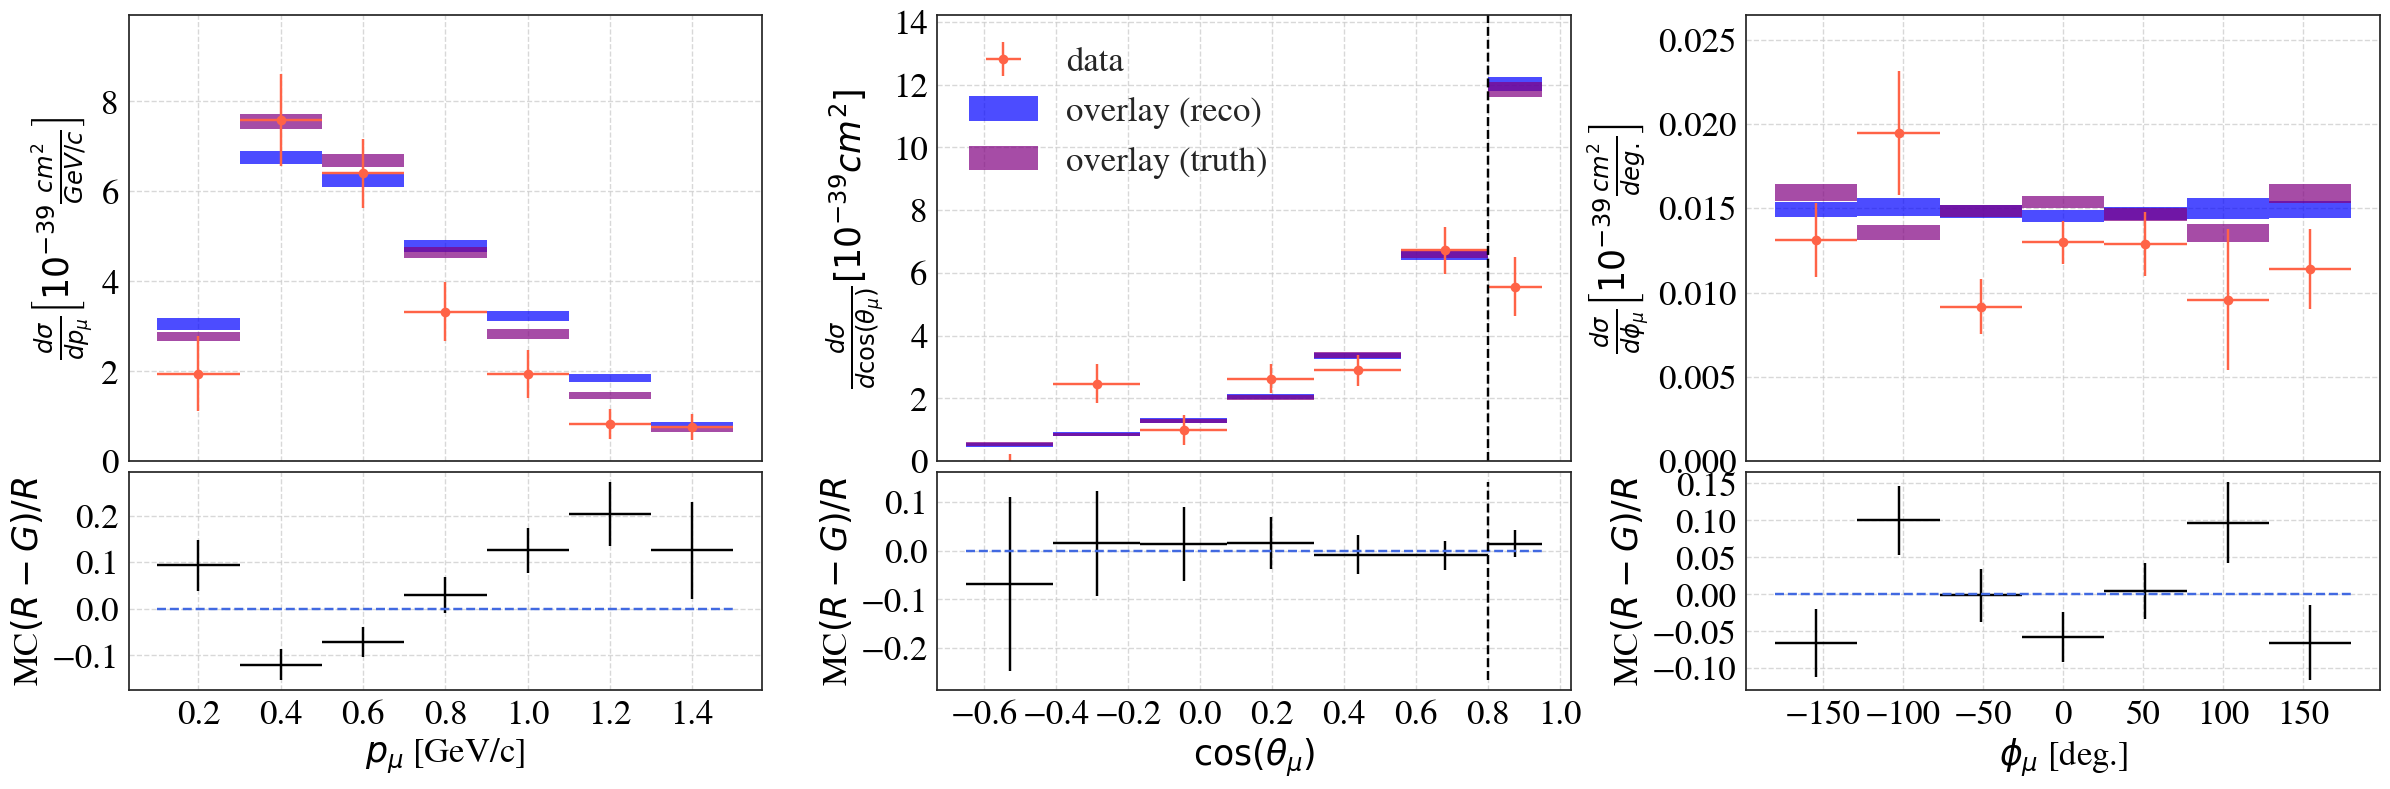

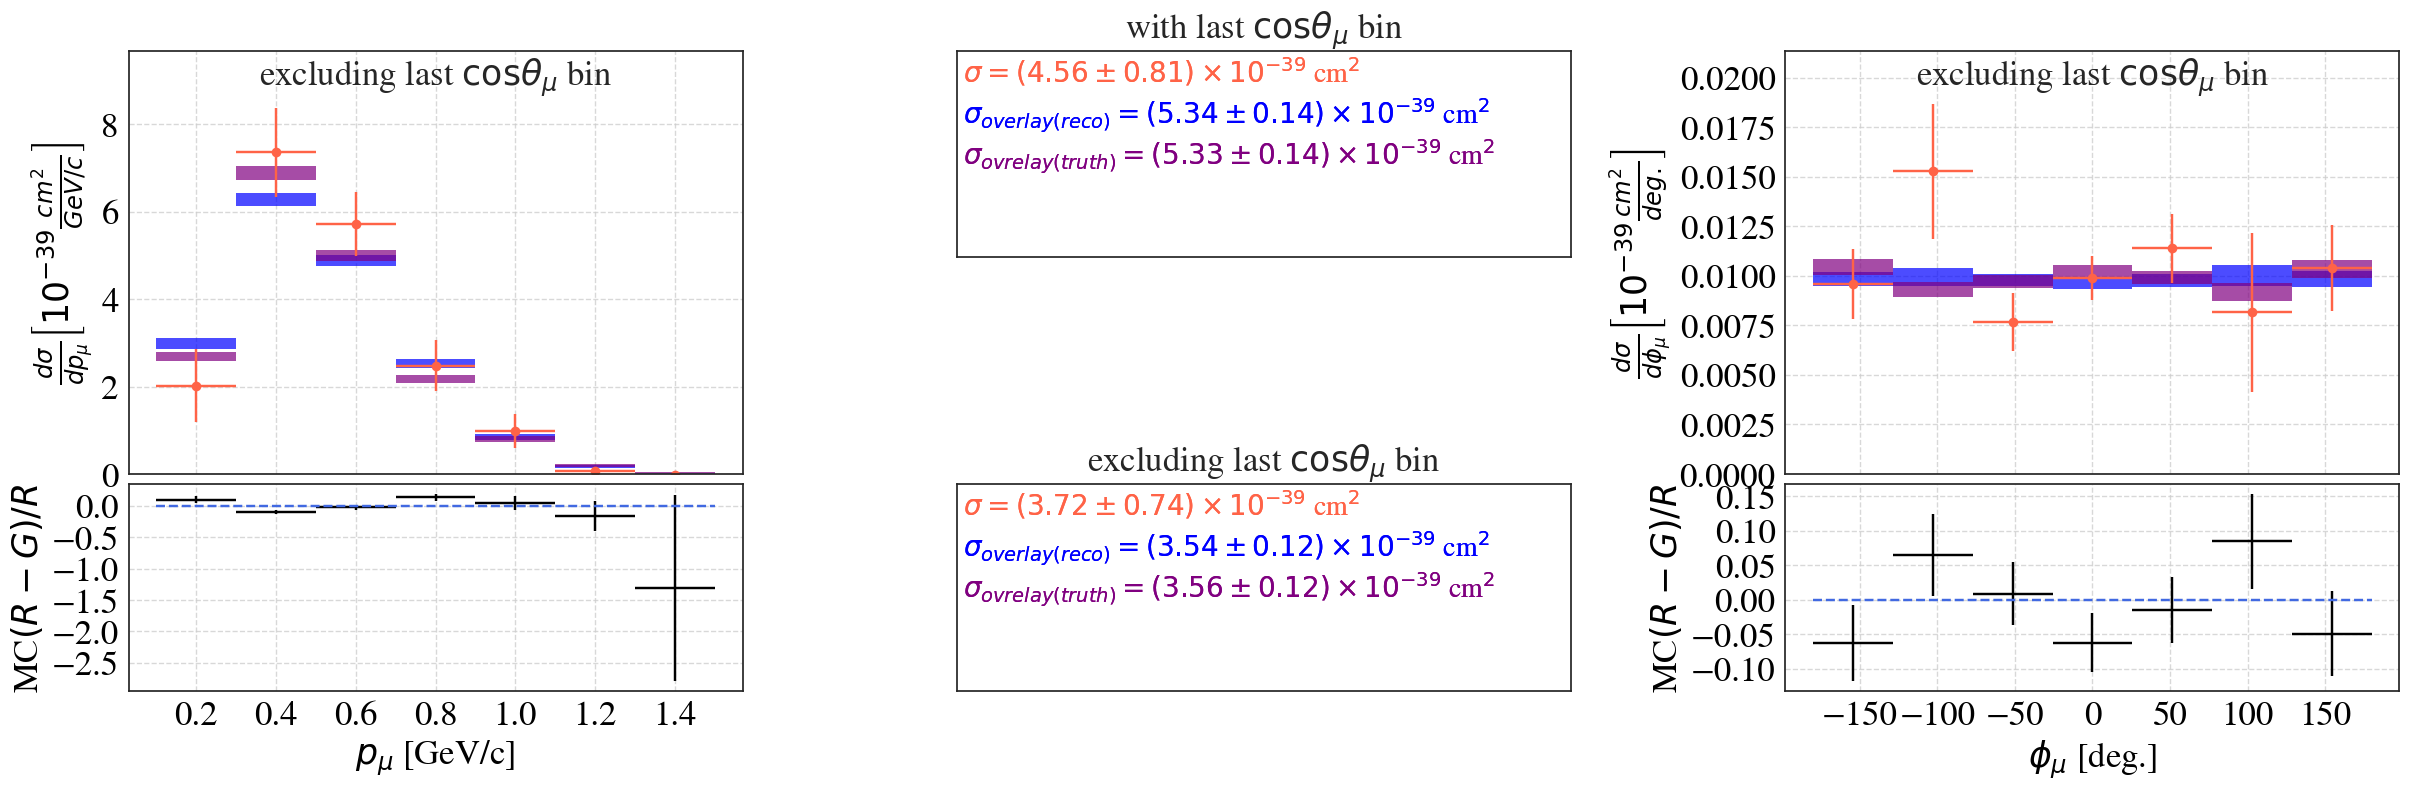

In [44]:
draw_Xsecs(do_add_afro_genie = True,do_corr_phi_0=True,debug=0,particle='mu',do_P=True,do_phi=True);

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pp_with_last_Pmu_cos_theta_bin_overlay_reco_truth.pdf
saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/systematics/Xsec_1D_Pp_without_last_Pmu_cos_theta_bin_overlay_reco_truth.pdf


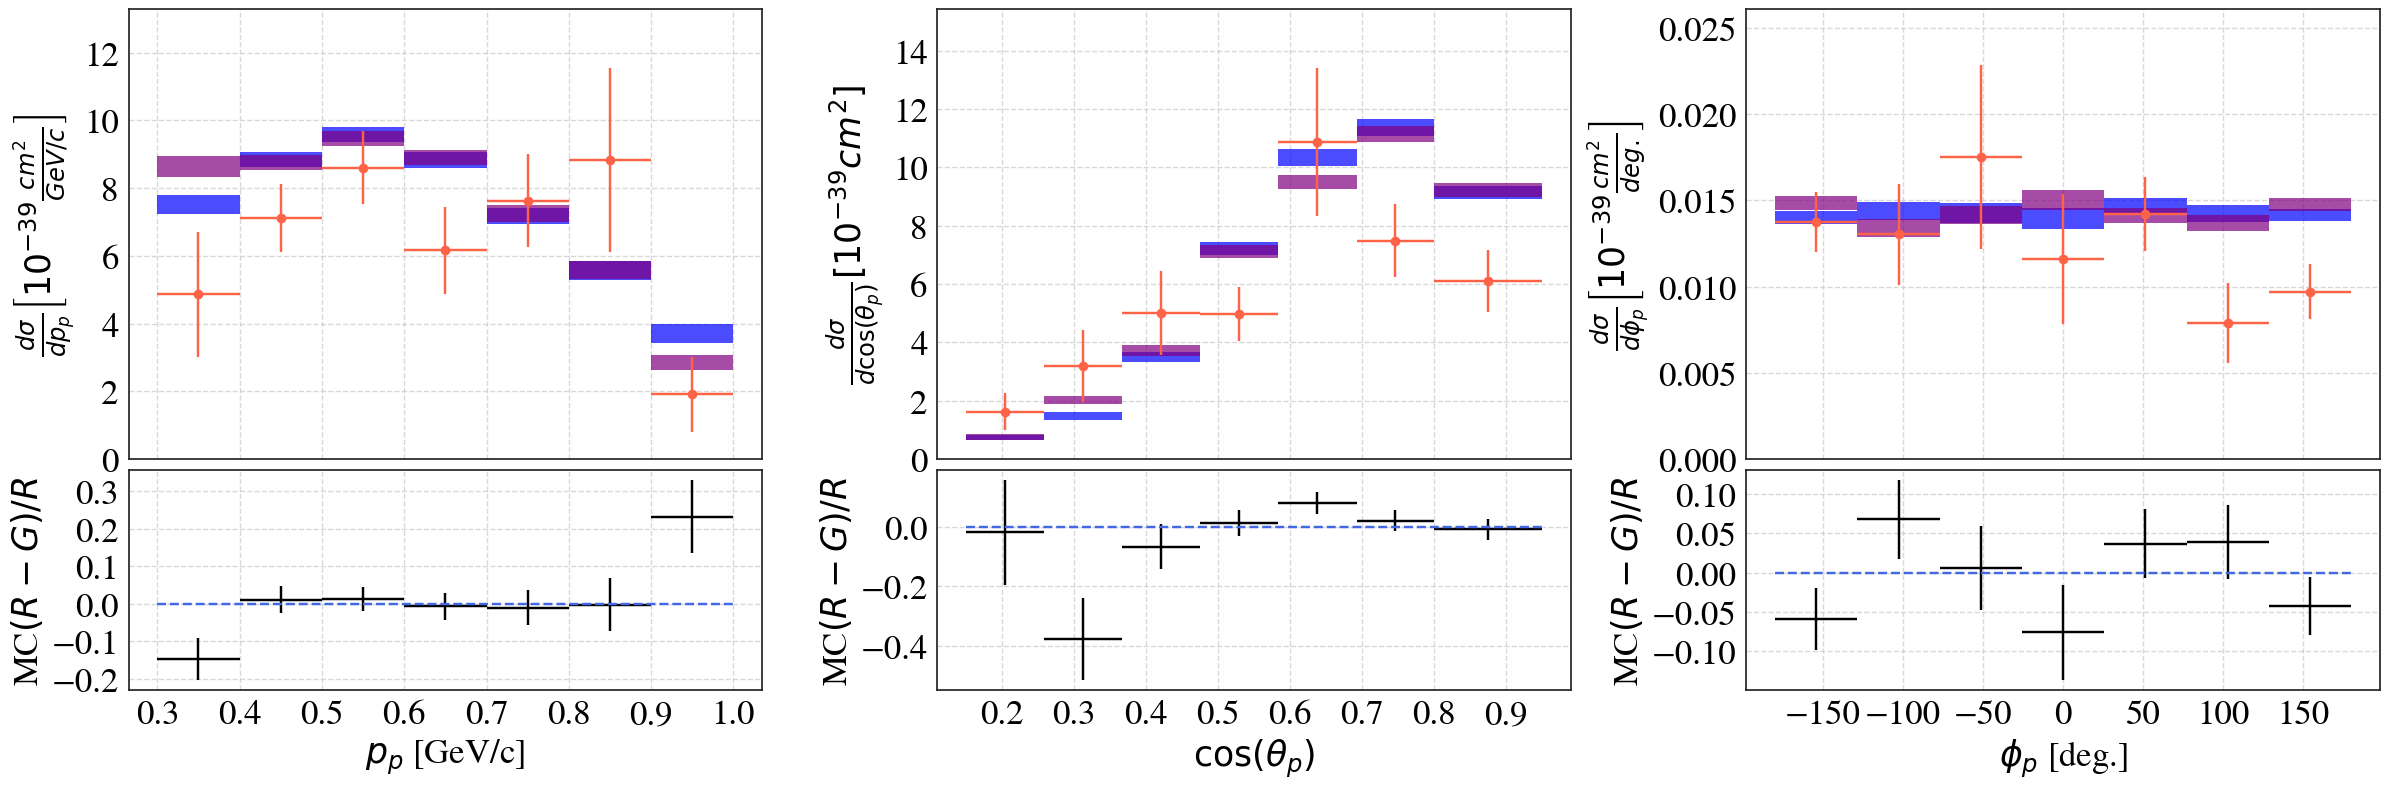

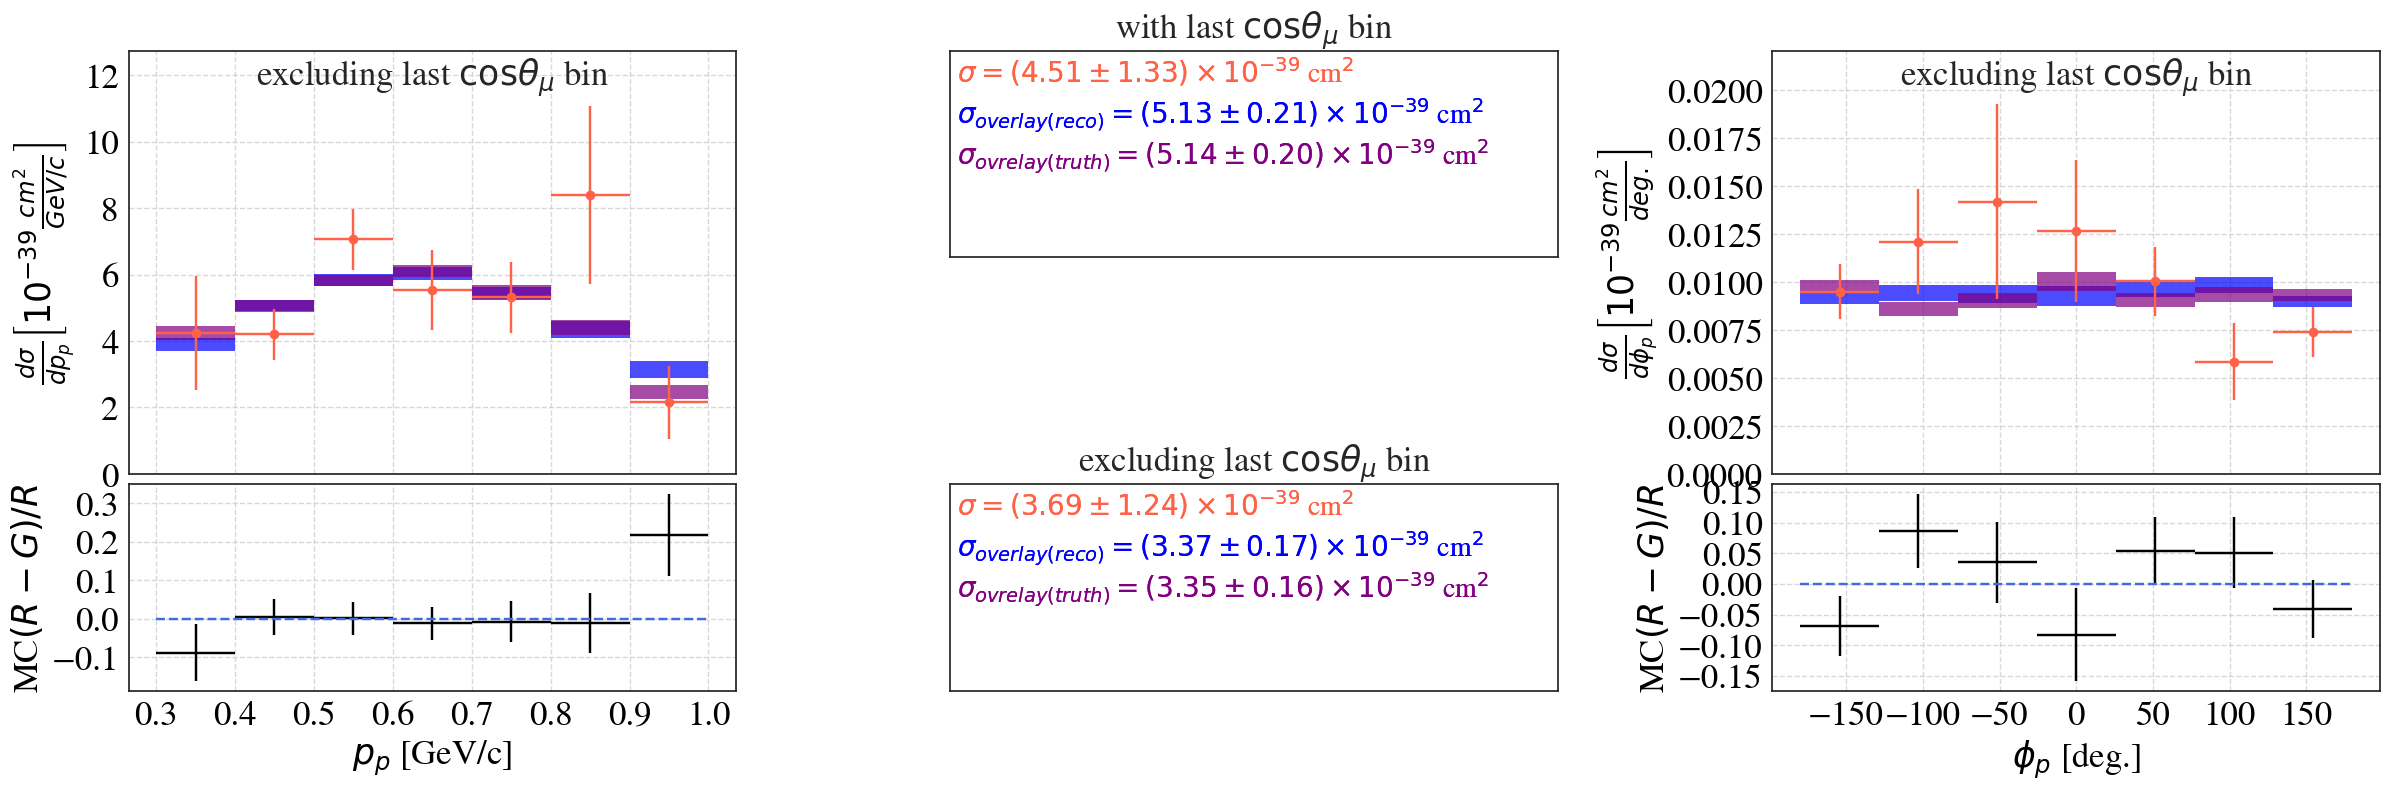

In [45]:
draw_Xsecs(do_add_afro_genie = True,do_corr_phi_0=True,debug=0,particle='p',do_P=True,do_phi=True);